### **Outliers**
`Outliers` are individual data points that significantly differ from the majority of the observations in a dataset. These are extreme values that lie unusually far from the central tendency of the data, such as the mean or median. Outliers can skew statistical analyses, distort the interpretation of results, and may indicate errors or unique cases within the dataset. Identifying and handling outliers is crucial for maintaining the accuracy and reliability of data analysis and modeling processes.

# Step 1: Import the necessary libraries
We start by importing the libraries we need: pandas for data manipulation and numpy for numerical operations.

# Step 2: Create the data
Generate a simple dataset with ages ranging from 20 to 50 and store it in a DataFrame called 'data'.

# Step 3: Calculate the mean and standard deviation
Compute the mean and standard deviation of the ages in the dataset.

# Step 4: Calculate the Z-Score
Calculate the Z-Score for each age in the dataset, which helps identify how far each age is from the mean in terms of standard deviations.

# Step 5: Print the data
Display the original data with the newly calculated Z-Score.

# Step 6: Print the outliers
Identify and print the outliers in the data based on a Z-Score threshold of 3. Outliers are ages that significantly deviate from the mean.

# Step 7: Remove the outliers
Filter the data to exclude rows with ages that have Z-Scores greater than 3, effectively removing outliers.

# Step 8: Print the data without outliers
Display the modified dataset without the identified outliers.


In [27]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the mean and standard deviation
mean = np.mean(data['Age'])
std = np.std(data['Age'])

# Step 4: Calculate the Z-Score
data['Z-Score'] = (data['Age'] - mean) / std

# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# # Step 6: Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {data[data['Z-Score'] > 3]}")
print("----------------------------------------")
# # Step 7: Remove the outliers
data = data[data['Z-Score'] <= 3]

# Step 8: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
----------------------------------------
Here are the outliers based on the z-score threshold, 3:
     Age   Z-Score
11   50  3.037793
----------------------------------------
Here is the data without outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628


`You can also follow the steps below to implement the Z-Score method in Python, using scipy library:`

In [45]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


` IQR Method Example in Python
IQR method ko Python mein implement karne ke liye, neeche diye gaye steps follow karein:`

In [46]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


*`Clustering Method (K-Means)`*\
Clustering method mein, hum data points ko clusters mein divide karte hain. This can be done using the K-Means clustering algorithm. Where we specify the number of clusters we want to divide the data into. Then we assign each data point to a cluster. Then we calculate the distance of each data point from the centroid of the cluster it belongs to. Then we remove the data points that are farthest from the centroid of the cluster they belong to.

In [47]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[30, 30], [31, 31], [32, 32]]


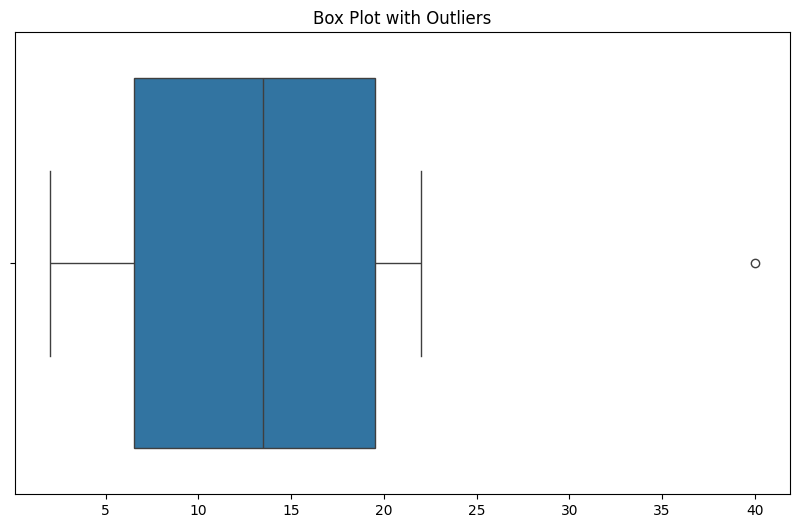

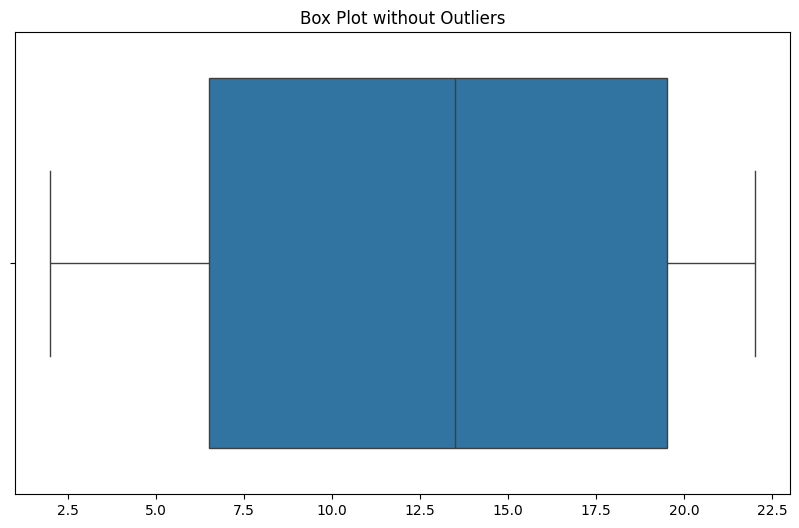

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data with an outlier
data_with_outlier = [5, 2, 6, 8, 15, 12, 18, 22, 20, 40]

# Create box plot with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_with_outlier, showfliers=True)
plt.title("Box Plot with Outliers")
plt.show()

# Create box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_with_outlier, showfliers=False)
plt.title("Box Plot without Outliers")
plt.show()
